In [8]:
import pandas as pd
import numpy as np
import pyross
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data-by-day.csv', parse_dates = ['date_of_interest'])

In [312]:
df.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE,death_rate,cum_case,cum_death,ratio,growth_rate,Rt,daily_death_rate
0,2020-02-29,1,0,1,0,0,0,0,0,0,...,0,0,0,0.0,1,0,NaN,NaN,NaN,0.0
1,2020-03-01,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,1,0,1.0,0.0,1.0,NaN
2,2020-03-02,0,0,2,0,0,0,0,0,0,...,0,0,0,0.0,1,0,1.0,0.0,1.0,NaN
3,2020-03-03,1,0,7,0,0,0,0,0,0,...,0,0,0,0.0,2,0,2.0,1.0,8.0,0.0
4,2020-03-04,5,0,2,0,0,0,0,0,0,...,0,0,0,0.0,7,0,3.5,2.5,18.5,0.0


In [5]:
# We have data of 428 days, from 2020-2-29 to 2021-5-1
len(df)

428

### Timeline:
Lockdown
2020-3-16 NYC public schools close <br>
2020-3-17 NYC bars and restaurants close <br>
2020-6-8 NYC begins Phase 1 reopening <br>
2020-6-22 NYC begins Phase 2 reopening <br>
2020-7-6 NYC begins Phase 3 reopening <br>
2020-7-19 NYC begins Phase 4 reopening <br>

https://www.investopedia.com/historical-timeline-of-covid-19-in-new-york-city-5071986
    

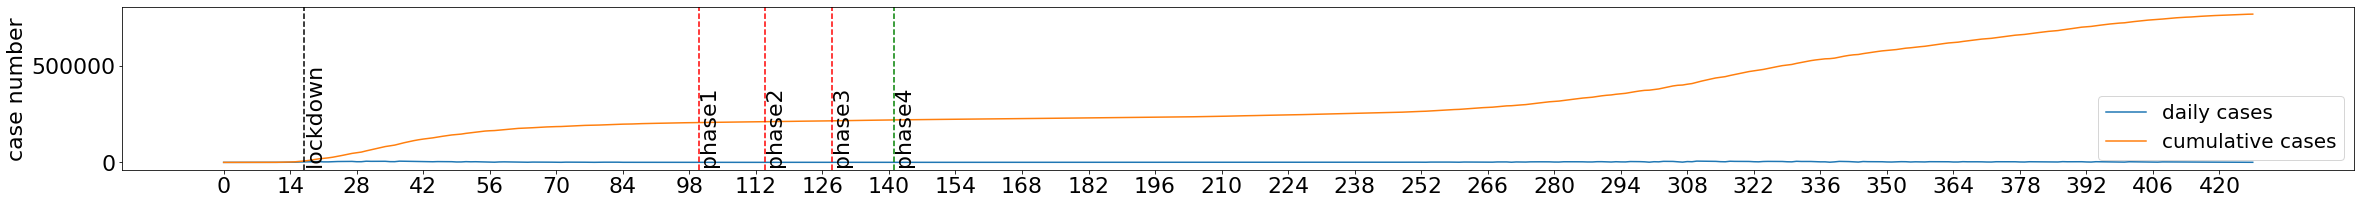

In [267]:
# daily vs cumulative cases
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['CASE_COUNT'],label = 'daily cases')
plt.ylabel('case number')
plt.plot(df['cum_case'],label ='cumulative cases')
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0,'phase2',rotation=90)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0,'phase3',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0,'phase4',rotation=90)
plt.legend(fontsize=20)
plt.show()

In [ ]:
df['cum_case'] = df['CASE_COUNT'].cumsum()

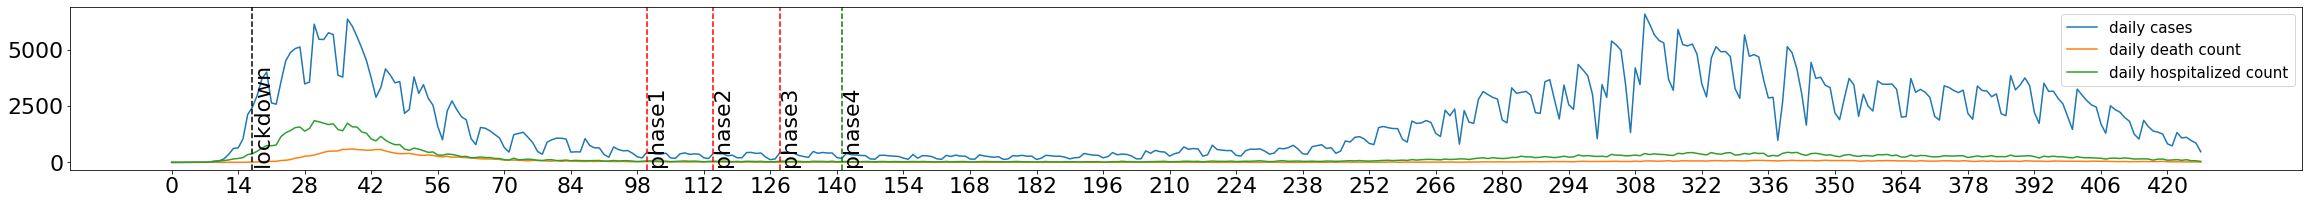

In [302]:
# daily cases/hospitalized/death
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['CASE_COUNT'],label = "daily cases")
plt.plot(df['DEATH_COUNT'],label = "daily death count")
plt.plot(df['HOSPITALIZED_COUNT'],label = "daily hospitalized count")
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0,'phase2',rotation=90)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0,'phase3',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0,'phase4',rotation=90)
plt.legend(fontsize = 15)
plt.show()

In [95]:
df['daily_death_rate'] = df['DEATH_COUNT']/df['CASE_COUNT']

In [96]:
df['daily_death_rate'].mean()

0.035207919149130705

In [ ]:
df['cum_death'] = df['DEATH_COUNT'].cumsum()
df['death_rate'] = df['cum_death']/df['cum_case']

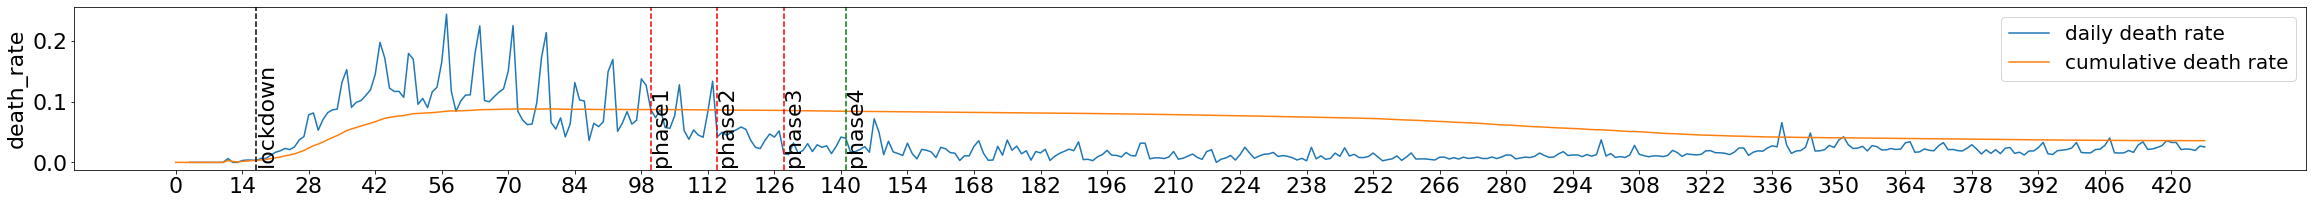

In [269]:
# daily vs cumulative death rate
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['daily_death_rate'],label = "daily death rate")
plt.ylabel('death_rate')
plt.plot(df['death_rate'],label = "cumulative death rate")
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0,'phase2',rotation=90)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0,'phase3',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0,'phase4',rotation=90)
plt.legend(fontsize = 20)
plt.show()

In [50]:
df['cum_death'] = df['DEATH_COUNT'].cumsum()

In [323]:
df['mortality_rate_7d'] = df['cum_death'].div(df['cum_case'].shift(7))

In [324]:
df[['cum_death','cum_case','mortality_rate_7d']][14:28]

,cum_death,cum_case,mortality_rate_7d
14,3,1943,0.120000
15,7,2978,0.152174
16,15,5099,0.145631
17,23,7551,0.133721
18,43,10522,0.131498
19,67,14229,0.098240
20,114,18236,0.087625
21,158,20874,0.081318
22,207,23454,0.069510
23,289,27024,0.056678


### It is quite obvious that the death rate growth fast before lockdown and slowed down afterward. However, considering the 7 day duration of COVID-19, it may be more reasonable to calculate 7 day mortality rate.

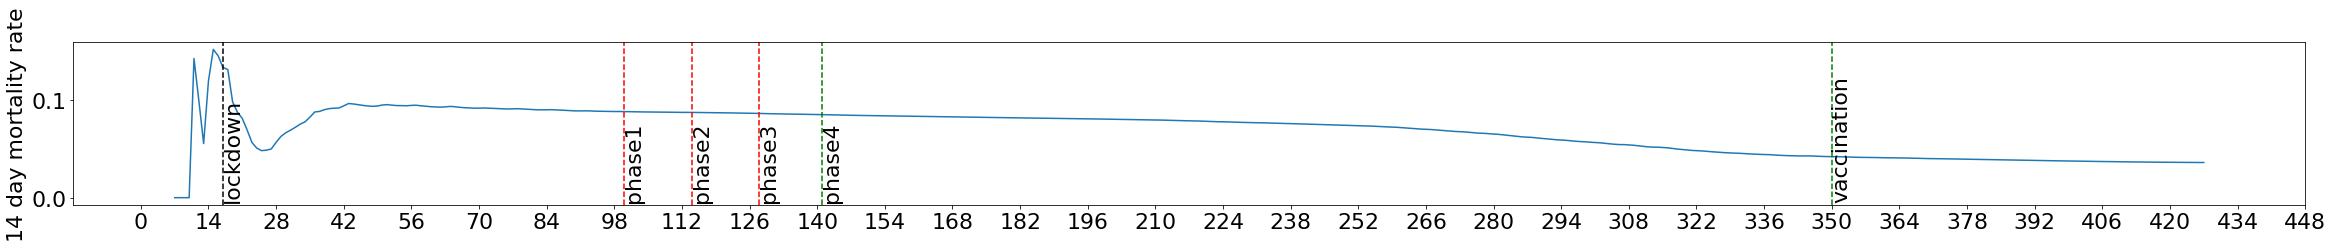

In [325]:
#7 day mortality rate
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['mortality_rate_14d'])
plt.ylabel('14 day mortality rate')
plt.xticks(np.arange(0, 450, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0,'phase1',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0,'phase2',rotation=90)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0,'phase3',rotation=90)
plt.text(141,0,'phase4',rotation=90)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0,'vaccination',rotation=90)
plt.show()

In [338]:
df.loc[7:21,'mortality_rate_7d'].mean()

0.08324133359375455

In [339]:
df['mortality_rate_7d'][7:].mean()

0.06918403017816352

In [216]:
df['growth_rate'] = df['CASE_COUNT'].div(df['cum_case'].shift(1))

In [217]:
df['growth_rate'].mean()

0.04182419362657529

In [218]:
df['growth_rate'].describe()

count    427.000000
mean       0.041824
std        0.186655
min        0.000000
25%        0.001729
50%        0.003551
75%        0.008135
max        2.500000
Name: growth_rate, dtype: float64

### We tried to estimate effective reproduction number instead of real R0, and found Rt surges quickly at the break out of COVID 19, decreased later and stablized after lockdown.

In [ ]:
gamma = 1/7
df['Rt'] = (df['growth_rate']/gamma)+1

In [ ]:
df['Rt'].describe()

In [242]:
# all time average Rt 
df['Rt'].mean()

1.2927693553860267

In [254]:
# Average Rt before lockdown
df.loc[0:17,'Rt'].mean()

6.344770758787839

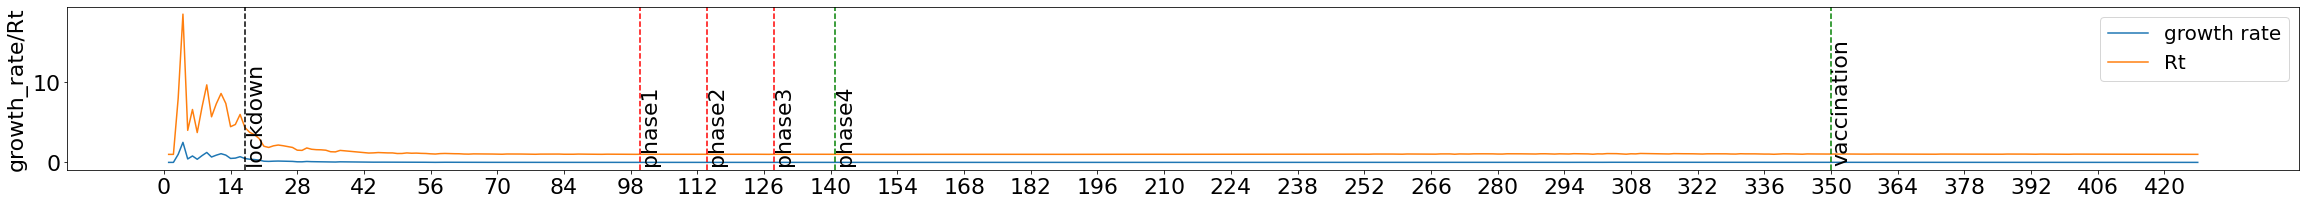

In [280]:
#daily growth rate vs Rt
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['growth_rate'],label = 'growth rate')
plt.ylabel('growth_rate/Rt')
plt.plot(df['Rt'],label = 'Rt')
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0.1,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0.1,'phase1',rotation=90)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0.1,'phase2',rotation=90)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0.1,'phase3',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0.1,'phase4',rotation=90)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0.1,'vaccination',rotation=90)
plt.legend(fontsize = 20)
plt.show()

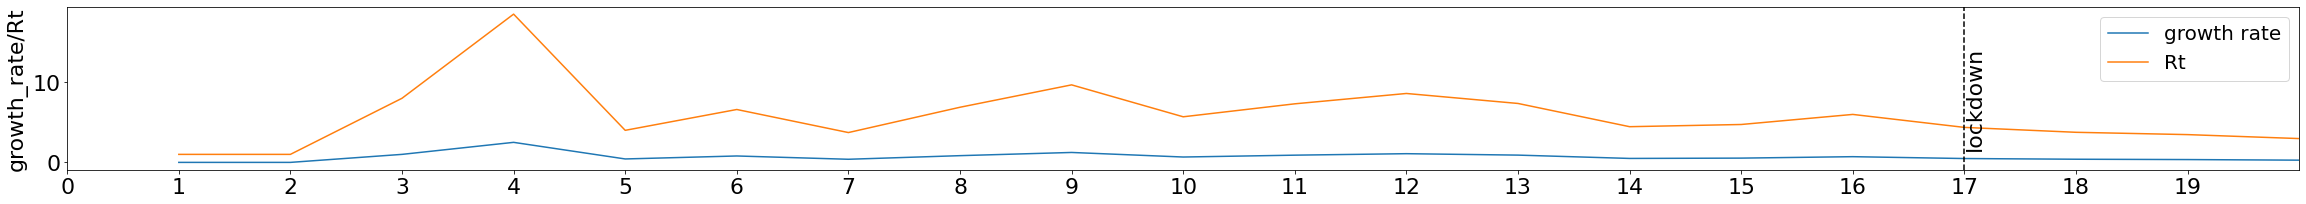

In [285]:
# daily growth rate vs Rt before lockdown
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['growth_rate'],label = 'growth rate')
plt.ylabel('growth_rate/Rt')
plt.plot(df['Rt'],label = 'Rt')
plt.xticks(np.arange(0, 20, 1.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,2,'lockdown',rotation=90)
plt.xlim([0,20])
plt.legend(fontsize = 20)
plt.show()

In [226]:
df['ratio'] = df['cum_case'].div(df['cum_case'].shift(1))

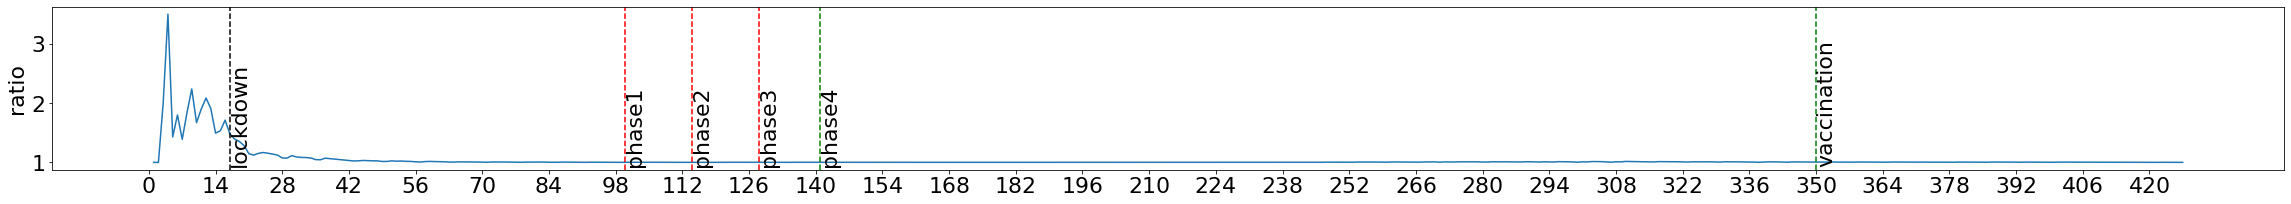

In [287]:
# ratio of daily cumulative cases
plt.rcParams["figure.figsize"] = (40,3)
plt.plot(df['ratio'])
plt.ylabel('ratio')
plt.xticks(np.arange(0, 430, 14.0))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,1,'lockdown',rotation=90)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,1,'phase1',rotation=90)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,1,'phase2',rotation=90)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,1,'phase3',rotation=90)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,1,'phase4',rotation=90)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,1,'vaccination',rotation=90)
plt.show()

In [228]:
df['ratio'].mean()

1.0418241936265749

### The population of NYC in 2020 is 18804000. The undetected infections are about 52% of the total number of Covid-19 infections. Death rate (0.04) was calculated from NYC data and assumed to be equal betwen asymptomatic and symptomatic infectives.
https://www.sciencedirect.com/science/article/pii/S1201971221000187

In [297]:
M = 1                  # the SIR model has no age structure
Ni =  18804000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group


alpha = 0.52            # fraction of asymptomatic infectives 
beta  = 0.2            # infection rate 
gIa   = 0.04            # removal rate of asymptomatic infectives 
gIs   = 0.04            # removal rate of symptomatic infectives 
gE    = 0.04           # removal rate of E
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate

E0  = np.array([0])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no removed individuals initially 
S0  = N-(Ia0+Is0+R0+E0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 500;  Nt=500;  

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, Ia0, Is0, contactMatrix, Tf, Nt)

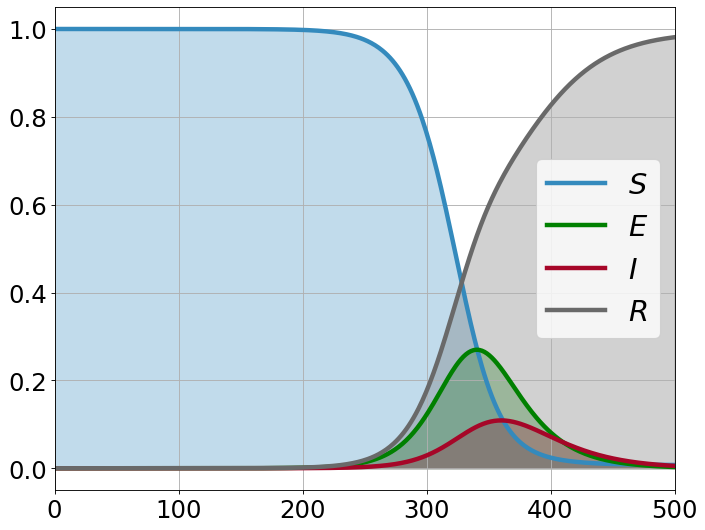

In [298]:
S  = data['X'][:,0].flatten()
E  = data['X'][:,1].flatten()
Ia = data['X'][:,2].flatten()
Is = data['X'][:,3].flatten()
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)


plt.fill_between(t, 0, Is/N, color='#A60628', alpha=0.3)
plt.plot(t, Is/N, '-', color='#A60628', label='$I$', lw=4)

R=N-S-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

### Comparison of true cases and infectives from simulation

We can see the true scenario was worse than simulation even after lockdown, but we avoided the exponential growth peak after day 300.

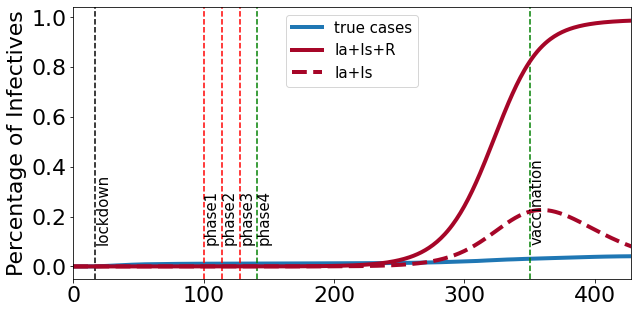

In [299]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df['cum_case']/18804000, lw=4,label = 'true cases')
plt.ylabel('Percentage of Infectives')
plt.xticks(np.arange(0, 428, 100))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0.1,'lockdown',rotation=90,fontsize = 15)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0.1,'phase1',rotation=90,fontsize = 15)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0.1,'phase2',rotation=90,fontsize = 15)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0.1,'phase3',rotation=90,fontsize = 15)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0.1,'phase4',rotation=90,fontsize = 15)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0.1,'vaccination',rotation=90,fontsize = 15)
plt.plot((Ia+Is+R)/18804000, '-', color='#A60628', label='Ia+Is+R', lw=4)
plt.plot((Ia+Is)/18804000, '--', color='#A60628', label='Ia+Is', lw=4)
#plt.ylim([0, 1e7])
plt.xlim([0, 428])
plt.legend(fontsize=15)
plt.show()

### Plot the effective basic reproductive ratio $\mathcal R_0^{\text{eff}}(t)$ as a function of time

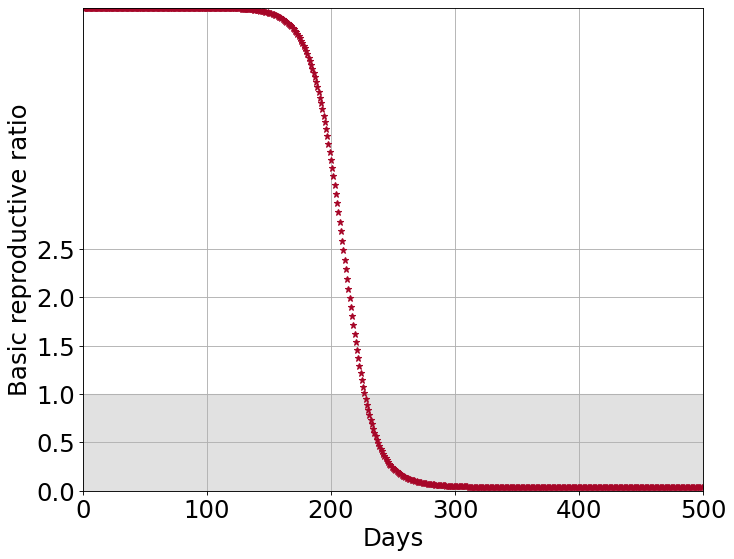

In [116]:
fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

C=np.identity(M); contactMatrix = pyross.contactMatrix.SIR(0.25*C, 0.25*C, 0.25*C, 0.25*C)
r0de = contactMatrix.basicReproductiveRatio(data, state='dynamic')

plt.fill_between(t, 0, t*0+1, color="dimgrey", alpha=0.2); plt.ylabel('Basic reproductive ratio')
plt.plot(r0de, '*', color='#A60628')
plt.xlabel('Days'); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True);
plt.yticks(np.arange(0, 3, step=0.5)); plt.ylim(0,5);

### Rt after NYC lockdown

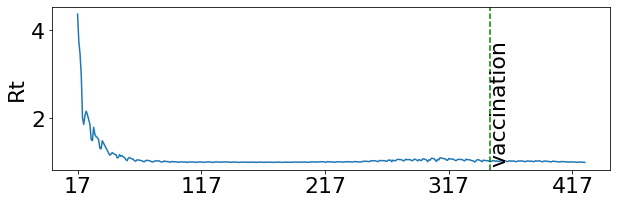

In [261]:
plt.rcParams["figure.figsize"] = (10,3)
plt.plot(df['Rt'].loc[17:,])
plt.ylabel('Rt')
plt.xticks(np.arange(17, 430, 100.0))
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,1.0,'vaccination',rotation=90)
plt.show()

R0 = $\beta$ $\frac{1}{\gamma+d}$ $\frac{k}{k+d}$

- beta: infectious rate 
- gamma:Per-capita rate of progression to infectious state
- d:natural death rate


In [186]:
#If we assume a 0.6% natural death rate given historical data of NYC, gamma = 1/7, 
#given our average Rt (1.29)to estimate R0.
beta = 1.29 * (1/7+0.006)* (0.966/0.96)
print('inferred beta from real data is:', round(beta,4))

inferred beta from real data is: 0.1932


### If run simulation using parameters estimated from data before lockdown

We can see the real cases are quite similar to simulation until phase 1 open. But if there was no lockdown enforcement, the exponential growth peak would happened in much earlier than previous simulation.

In [334]:
#If we assume a 0.6% natural death rate given historical data of NYC, gamma = 1/7, given our average Rt (6.34)to estimate R0.
beta = 6.34 * (1/7+0.006)* (0.966/0.96)
print('inferred beta from real data is:', round(beta,4))

inferred beta from real data is: 0.9497


In [306]:
M = 1                  # the SIR model has no age structure
Ni =  18804000*np.ones(M)   # so there is only one age group 
N = np.sum(Ni)         # and the total population is the size of this age group


alpha = 0.52            # fraction of asymptomatic infectives 
beta  = 0.95            # infection rate 
gIa   = 0.02            # removal rate of asymptomatic infectives 
gIs   = 0.02            # removal rate of symptomatic infectives 
gE    = 0.04           # removal rate of E
fsa   = 1              # Fraction by which symptomatic individuals do not self isolate

E0  = np.array([0])
Ia0 = np.array([0])     # the SIR model has only one kind of infective 
Is0 = np.array([1])     # we take these to be symptomatic 
R0  = np.array([0])     # and assume there are no removed individuals initially 
S0  = N-(Ia0+Is0+R0+E0)    # so that the initial susceptibles are obtained from S + Ia + Is + R = N

# there is no contact structure
def contactMatrix(t):   
    return np.identity(M) 

# duration of simulation and data file
Tf = 500;  Nt=500;  

# instantiate model
parameters = {'alpha':alpha, 'beta':beta, 'gIa':gIa, 'gIs':gIs, 'gE':gE, 'fsa':fsa}
model = pyross.deterministic.SEIR(parameters, M, Ni)

# simulate model
data=model.simulate(S0, E0, Ia0, Is0, contactMatrix, Tf, Nt)

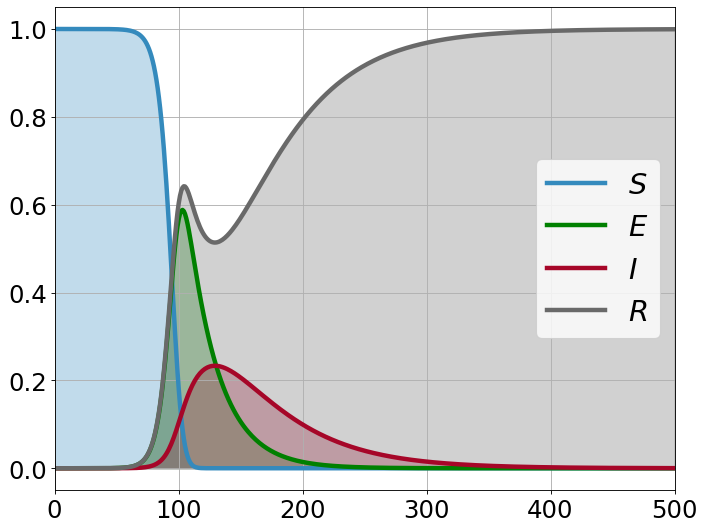

In [307]:
S  = data['X'][:,0].flatten()
E  = data['X'][:,1].flatten()
Ia = data['X'][:,2].flatten()
Is = data['X'][:,3].flatten()
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})


plt.fill_between(t, 0, S/N, color="#348ABD", alpha=0.3)
plt.plot(t, S/N, '-', color="#348ABD", label='$S$', lw=4)

plt.plot(t, E/N, '-', color="green", label='$E$', lw=4)
plt.fill_between(t, 0, E/N, color='green', alpha=0.3)


plt.fill_between(t, 0, Is/N, color='#A60628', alpha=0.3)
plt.plot(t, Is/N, '-', color='#A60628', label='$I$', lw=4)

R=N-S-Ia-Is; plt.fill_between(t, 0, R/N, color="dimgrey", alpha=0.3)
plt.plot(t, R/N, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)

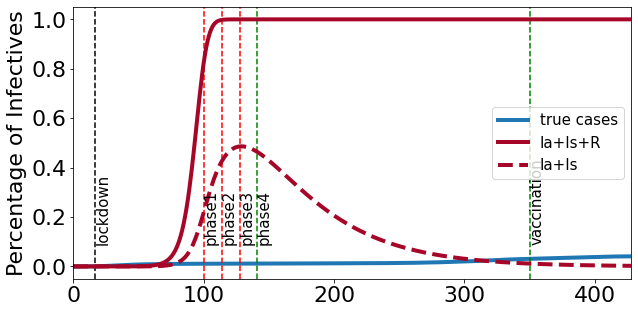

In [308]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df['cum_case']/18804000, lw=4,label = 'true cases')
plt.ylabel('Percentage of Infectives')
plt.xticks(np.arange(0, 428, 100))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0.1,'lockdown',rotation=90,fontsize = 15)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0.1,'phase1',rotation=90,fontsize = 15)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0.1,'phase2',rotation=90,fontsize = 15)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0.1,'phase3',rotation=90,fontsize = 15)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0.1,'phase4',rotation=90,fontsize = 15)
plt.axvline(x=350,color='g', linestyle='--')
plt.text(350,0.1,'vaccination',rotation=90,fontsize = 15)
plt.plot((Ia+Is+R)/18804000, '-', color='#A60628', label='Ia+Is+R', lw=4)
plt.plot((Ia+Is)/18804000, '--', color='#A60628', label='Ia+Is', lw=4)
plt.xlim([0, 428])
plt.legend(fontsize=15)
plt.show()

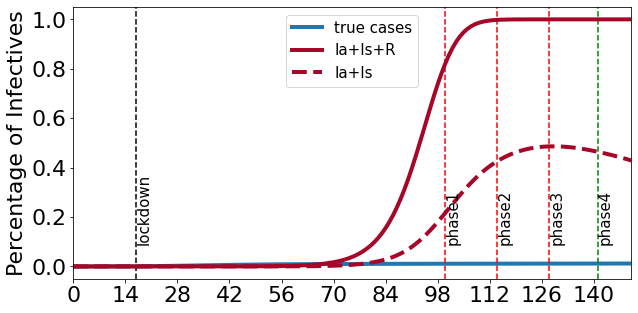

In [309]:
## zoom in before phase 4
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(df['cum_case']/18804000, lw=4,label = 'true cases')
plt.ylabel('Percentage of Infectives')
plt.xticks(np.arange(0, 150, 14))
plt.axvline(x=17,color='k', linestyle='--')
plt.text(17,0.1,'lockdown',rotation=90,fontsize = 15)
plt.axvline(x=100,color='r', linestyle='--')
plt.text(100,0.1,'phase1',rotation=90,fontsize = 15)
plt.axvline(x=114,color='r', linestyle='--')
plt.text(114,0.1,'phase2',rotation=90,fontsize = 15)
plt.axvline(x=128,color='r', linestyle='--')
plt.text(128,0.1,'phase3',rotation=90,fontsize = 15)
plt.axvline(x=141,color='g', linestyle='--')
plt.text(141,0.1,'phase4',rotation=90,fontsize = 15)
plt.plot((Ia+Is+R)/18804000, '-', color='#A60628', label='Ia+Is+R', lw=4)
plt.plot((Ia+Is)/18804000, '--', color='#A60628', label='Ia+Is', lw=4)
plt.xlim([0, 150])
plt.legend(fontsize=15)
plt.show()